<a href="https://colab.research.google.com/github/wardasidd/MyDataScienceProjects/blob/main/Reference_Notebook_Malaria_Detection_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Malaria Detection model**
*by Warda Siddiqui*

##<b>Problem Definition</b>
**The context:**  Malaria is a contagious disease caused by tiny parasites called Plasmodium, which spread to humans through mosquito bites. These parasites enter the blood and damage the oxygen-carrying red blood cells, causing breathing problems and other complications. The dangerous part is that the parasites can stay in the body for over a year without showing symptoms. Late treatment can be fatal, and almost half of the world's population is at risk of malaria. Children under 5 years old are most vulnerable, accounting for 67% of malaria deaths worldwide. Traditional diagnosis is a slow and tedious process that can be affected by human errors. Using advanced technology like Artificial Intelligence and Machine Learning for automated detection can greatly improve accuracy and speed, making early diagnosis possible and potentially saving lives.<br>

**The objectives:** To Build an efficient computer vision model to detect malaria involves using a Convolutional Neural Network (CNN) architecture, ensuring that it is well-suited for image classification tasks.<br>

**The key questions:** The following key questions are needed to be answered:

1. What is the purpose of the model (detect malaria in red blood cells)?
2. Do we have a suitable dataset with parasitized and uninfected cell images?
3. Which CNN architecture and hyperparameters should be used?
4. How to preprocess the data?
5. What evaluation metrics and validation methods to use?
6. How to prevent overfitting during training?
7. Where and how to deploy the model effectively?
<br>
**The problem formulation:** Using data science, we are aiming to detect Malairia while using the image sets of bloodcells and gain insights from data to make informed decisions.
The objective of data science for the specific problem includes prediction (To predict each cell image either as parasitized or uninfected)

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


###<b> Mount the Drive

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <b>Loading libraries</b>

In [ ]:
# Importing libraries required to load the data
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same to your Google Drive. Then unzip the folder.

In [ ]:
# Storing the path of the data file from the Google drive
import zipfile
# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile('/content/drive/MyDrive/cell_images.zip', 'r') as zip_ref:

    zip_ref.extractall()

The extracted folder has different folders for train and test data will contain the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

**Train Data**

In [ ]:
# Replace 'train_parasitized_path' and 'train_uninfected_path' with the actual paths to the respective folders
train_folder = '/content/cell_images/train'
# Common size for resizing the images
image_size = 64
train_images=[]
train_labels=[]
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(train_folder + folder_name)

    for i, image_name in enumerate(images_path):

        try:

            # Opening each image using the path of that image
            image = Image.open(train_folder + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((image_size, image_size))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                train_labels.append(1)

            else:

                train_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

**Test Data**

In [ ]:
# Replace 'train_parasitized_path' and 'train_uninfected_path' with the actual paths to the respective folders
test_folder = '/content/cell_images/test'
# Common size for resizing the images
image_size = 64
test_images=[]
test_labels=[]
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(test_folder + folder_name)

    for i, image_name in enumerate(images_path):

        try:

            # Opening each image using the path of that image
            image = Image.open(test_folder + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((image_size, image_size))

            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b> Check the shape of train and test images

In [ ]:
# shape of train and test images
len(test_images), len(train_images)

(2600, 24958)

###<b> Check the shape of train and test labels

In [ ]:
#cHECKING THE SHAPE OF TRAIN AND TEST LABELS
len(test_labels), len(train_labels)

(2600, 24958)

####<b> Observations and insights:

1. As we have extracted the Train and Test data we have found total of 2600 test images and 2600 of test labels.
2. we have 24958 train images and 24958 train labels


### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
# Check the minimum and maximum range of pixel values for train images
train_min_pixel_value = np.min(train_images)
train_max_pixel_value = np.max(train_images)

# Check the minimum and maximum range of pixel values for test images
test_min_pixel_value = np.min(test_images)
test_max_pixel_value = np.max(test_images)

In [ ]:
print("Minimum pixel value of Train images:", train_min_pixel_value)
print("Maximum pixel value of Train images:", train_max_pixel_value)
print("Minimum pixel value of Test images:", test_min_pixel_value)
print("Maximum pixel value of Test images:", test_max_pixel_value)

Minimum pixel value of Train images: 0
Maximum pixel value of Train images: 255
Minimum pixel value of Test images: 0
Maximum pixel value of Test images: 255


####<b> Observations and insights:


1.   we have observed the minnimum and maximum pixels i.e. 0 and 255 respectively.





###<b> Count the number of values in both uninfected and parasitized

In [ ]:
# Count the number of parasitized and uninfected images in the training data
train_parasitized = np.sum(train_labels == 1)
train_uninfected = np.sum(train_labels == 0)

# Count the number of parasitized and uninfected images in the test data
test_parasitized = np.sum(test_labels == 1)
test_uninfected = np.sum(test_labels == 0)

print("Number of parasitized  Train images:", train_parasitized)
print("TNumber of uninfected Train images:", train_uninfected)

print("Number of parasitized Test images:", test_parasitized)
print("Number of uninfected Test images:", test_uninfected)


Number of parasitized  Train images: 12582
TNumber of uninfected Train images: 12376
Number of parasitized Test images: 1300
Number of uninfected Test images: 1300


###<b>Normalize the images

In [ ]:
# Normalizing the image pixels
train_normalized = train_images/255
test_normalized = test_images/255

####<b> Observations and insights:



1.   As observed , from total of 24958 train images we have 12376 uninfected and 12582 parasitized
2.   Out of 2600 Test images we have 1300 images for each (uninfected and parasitized)



###<b> Plot to check if the data is balanced

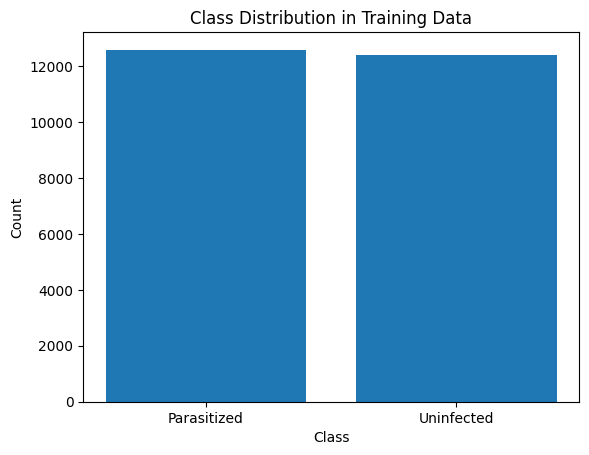

In [ ]:
# Count the number of parasitized and uninfected images in the training data
train_parasitized = np.sum(train_labels == 1)
train_uninfected = np.sum(train_labels == 0)

# Create a bar chart to visualize the class distribution
categories = ['Parasitized', 'Uninfected']
counts = [train_parasitized, train_uninfected]

plt.bar(categories, counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Training Data')
plt.show()


####<b> Observations and insights:

1.   As we can observe from the above bar plot the data is balanced.



### <b>Data Exploration</b>
Let's visualize the images from the train data

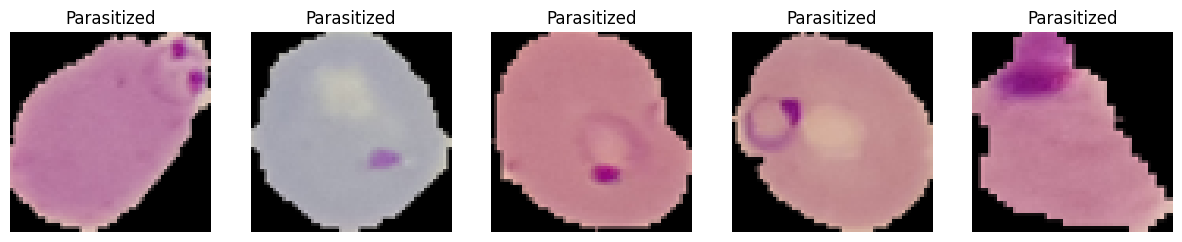

In [ ]:
# Define the class names for better visualization
class_names = ['Uninfected', 'Parasitized']

# Function to visualize a few sample images
def visualize_samples(images, labels, class_names, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        img = images[i].squeeze()  # Remove the batch dimension
        label = class_names[labels[i]]
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(label)
        axes[i].axis('off')
    plt.show()

# Select a few random samples from the training data
num_samples_per_class = 5
parasitized_samples_idx = np.where(train_labels == 1)[0][:num_samples_per_class]
uninfected_samples_idx = np.where(train_labels == 0)[0][:num_samples_per_class]
sample_indices = np.concatenate((parasitized_samples_idx, uninfected_samples_idx))

# Visualize the selected samples
visualize_samples(train_images[sample_indices], train_labels[sample_indices], class_names)

####<b> Observations and insights:

1.   we have observed random 5 images from train data
2.   Selected images are all parasitized



###<b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

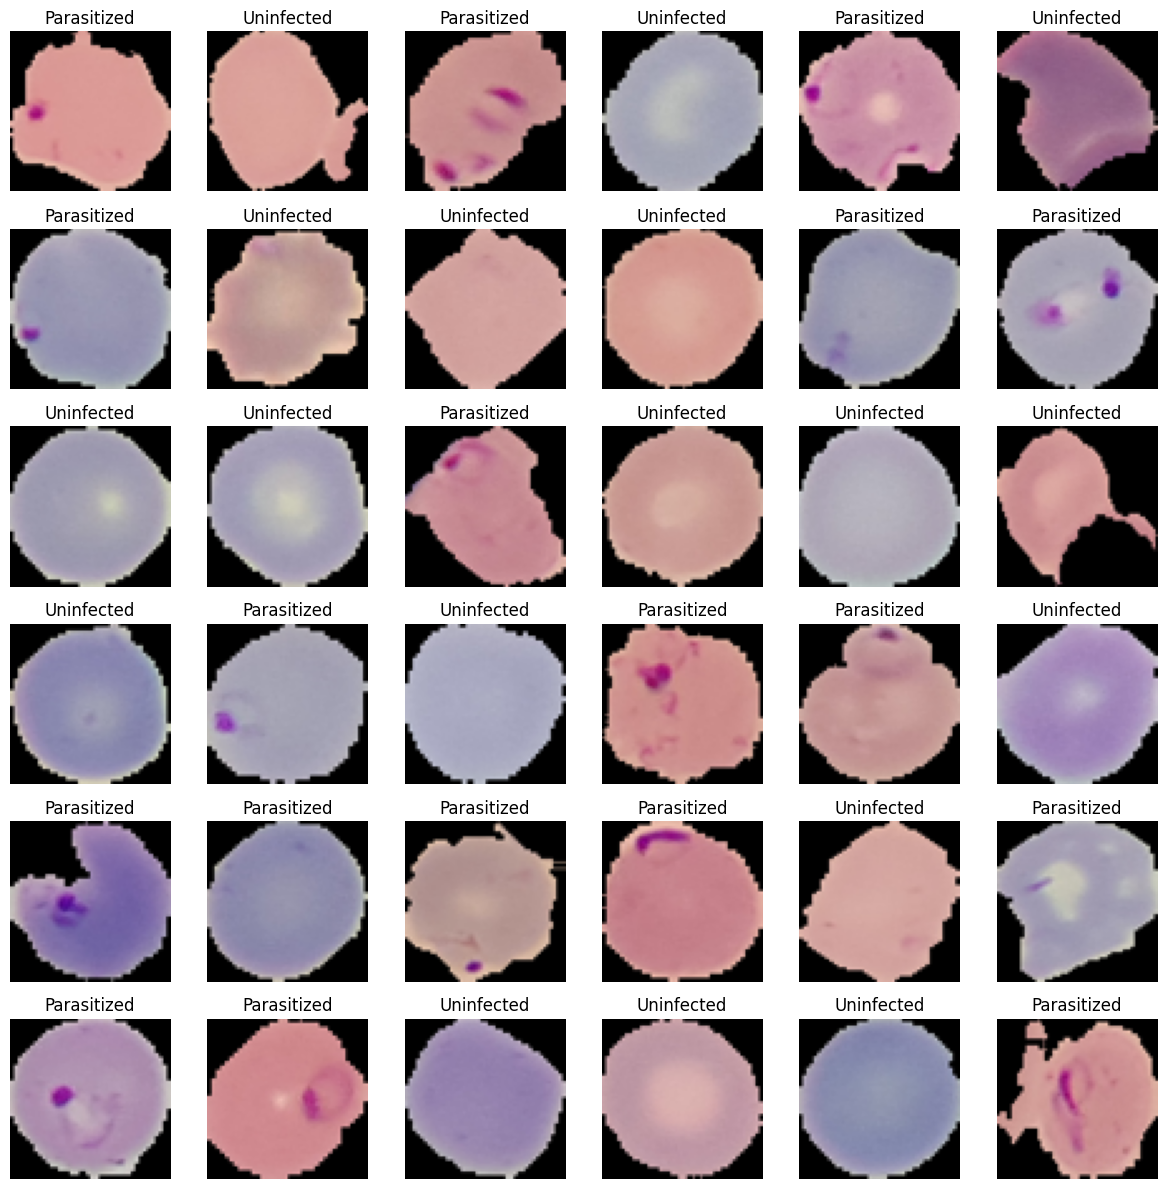

In [ ]:

class_names = ['Uninfected', 'Parasitized']

# Function to visualize the images in a grid
def visualize_samples(images, labels, class_names, rows=6, cols=6, figsize=(12, 12)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i in range(rows):
        for j in range(cols):
            index = i * cols + j
            # Remove the batch dimension
            img = images[index].squeeze()
            label = class_names[labels[index]]
            axes[i, j].imshow(img, cmap='gray')
            axes[i, j].set_title(label)
            axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()

# Select a few random samples from the training data
# 36 samples in total
num_samples = 6 * 6
sample_indices = np.random.choice(len(train_images), num_samples, replace=False)

# Visualize the selected samples
visualize_samples(train_images[sample_indices], train_labels[sample_indices], class_names, rows=6, cols=6, figsize=(12, 12))


####<b>Observations and insights:

###<b> Plotting the mean images for parasitized and uninfected

In [ ]:
# Function to calculate the mean image for the "parasitized" class
def get_mean_parasitized_image(images, labels):
    parasitized_images = images[labels == 1]
    return np.mean(parasitized_images, axis=0)

# Function to calculate the mean image for the "uninfected" class
def get_mean_uninfected_image(images, labels):
    uninfected_images = images[labels == 0]
    return np.mean(uninfected_images, axis=0)

def visualize_mean_image(mean_image, title, figsize=(6, 6)):
    plt.figure(figsize=figsize)
    plt.imshow(mean_image.squeeze(), cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

<b> Mean image for parasitized

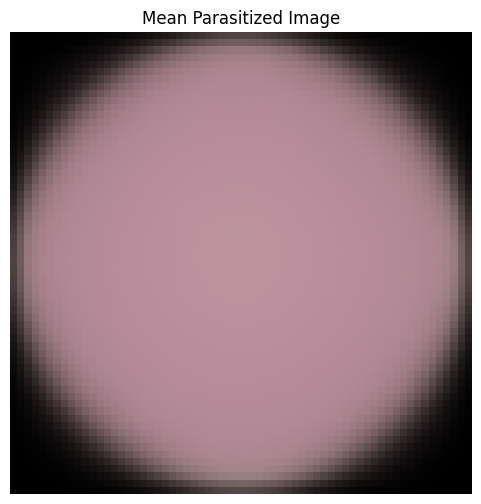

In [ ]:
mean_parasitized_image = get_mean_parasitized_image(train_normalized, train_labels)
visualize_mean_image(mean_parasitized_image, title='Mean Parasitized Image')

<b> Mean image for uninfected

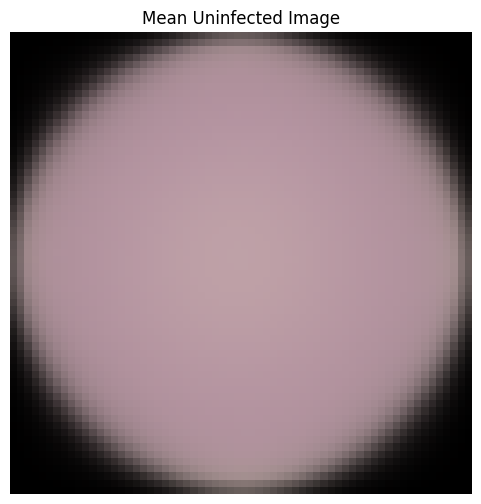

In [ ]:
mean_uninfected_image = get_mean_uninfected_image(train_normalized, train_labels)
visualize_mean_image(mean_uninfected_image, title='Mean Uninfected Image')


####<b> Observations and insights:
* In the above plots for mean parasitized is darker and is more prominent than the mean uninfected image.
* Mean Uninfected image looks a little dull, other than that there is no visible difference that can be observed by the naked eye.

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

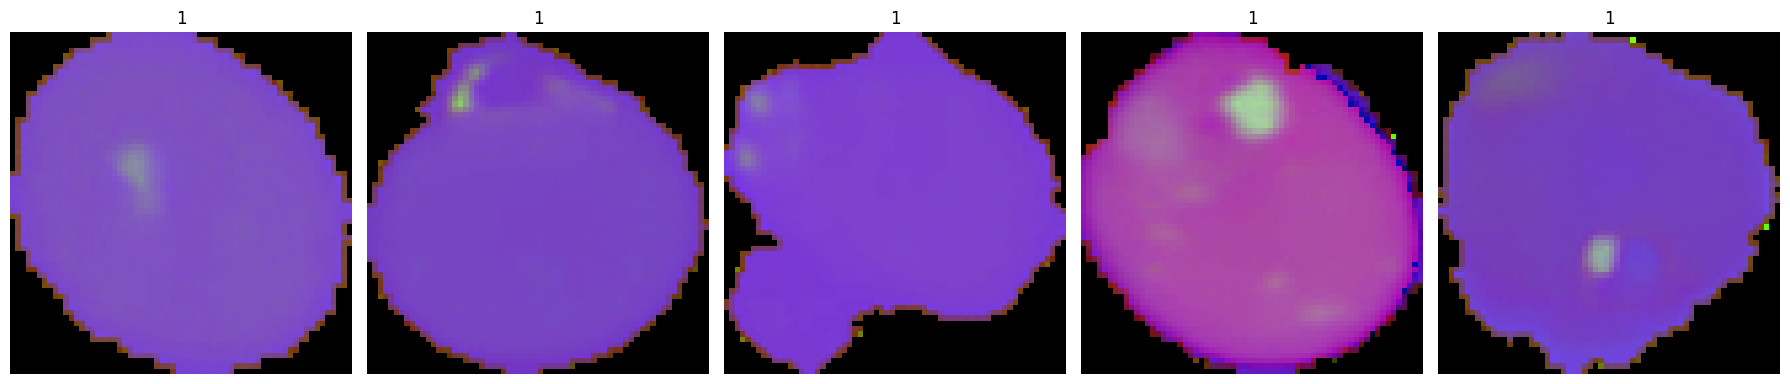

In [ ]:
import cv2

train_hsv = []   # to hold the HSV image array
for i in np.arange(0, 2600, 1):
    a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
    train_hsv.append(a)

train_hsv = np.array(train_hsv)
viewimage = np.random.randint(0, 100, 5)

fig, ax = plt.subplots(1, 5, figsize=(18, 18))

for t, i in enumerate(viewimage):
    Title = train_labels[i]
    ax[t].set_title(Title)
    ax[t].imshow(train_hsv[i])
    ax[t].set_axis_off()

fig.tight_layout()
plt.show()

###<b> Converting the test data

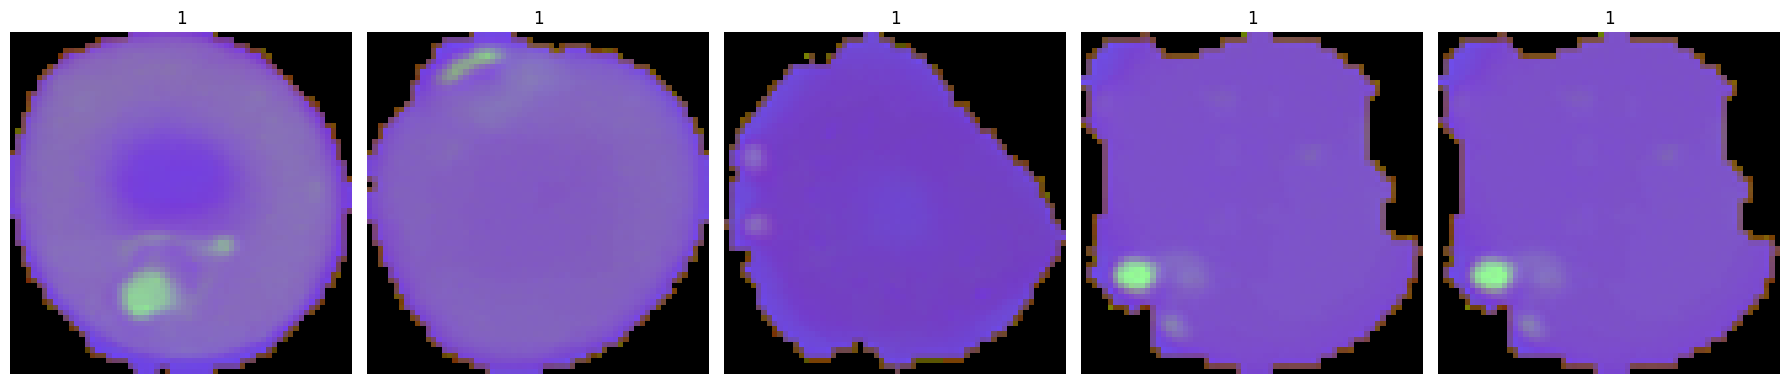

In [ ]:
test_hsv = []   # to hold the HSV image array
for i in np.arange(0, 2600, 1):
    a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
    test_hsv .append(a)

test_hsv  = np.array(test_hsv )
viewimage = np.random.randint(0, 100, 5)

fig, ax = plt.subplots(1, 5, figsize=(18, 18))

for t, i in enumerate(viewimage):
    Title = test_labels[i]
    ax[t].set_title(Title)
    ax[t].imshow(test_hsv[i])
    ax[t].set_axis_off()

fig.tight_layout()
plt.show()

####<b>Observations and insights:
* After converting the dataset to HSV it shows that the Parasitized cells can be easily detected because of much better contrast which helps in detecting plasmodium (green dot)in the image.


###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

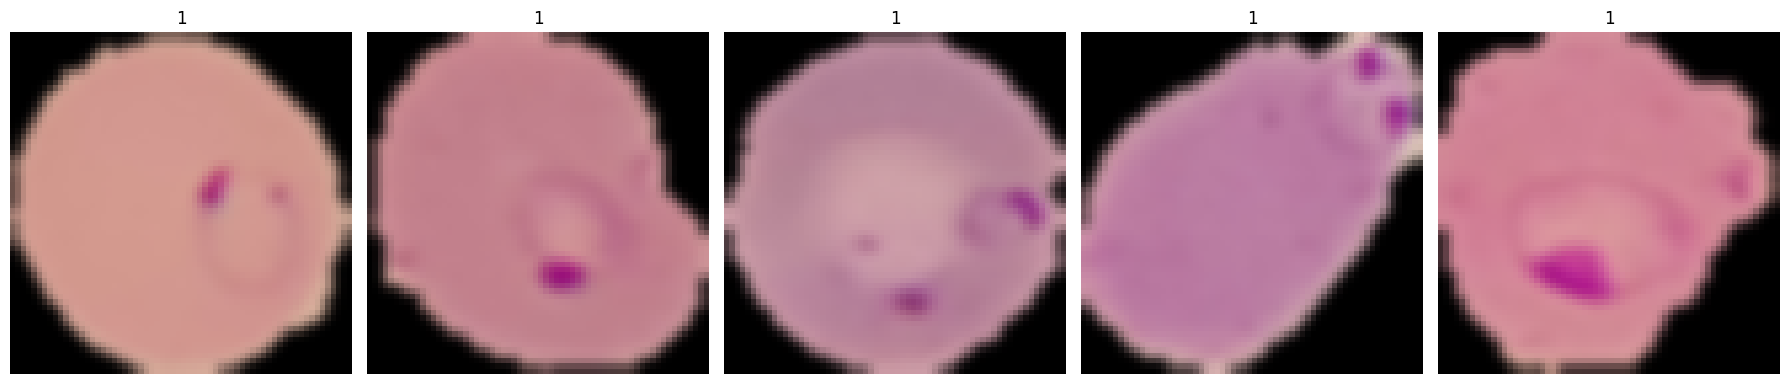

In [ ]:
import cv2

train_blurred = []   # to hold the HSV image array
for i in np.arange(0, 100, 1):
    a = cv2.GaussianBlur(train_images[i],(5,5),0)
    train_blurred.append(a)

train_blurred = np.array(train_blurred)
viewimage = np.random.randint(0, 100, 5)

fig, ax = plt.subplots(1, 5, figsize=(18, 18))

for t, i in enumerate(viewimage):
    Title = train_labels[i]
    ax[t].set_title(Title)
    ax[t].imshow(train_blurred[i])
    ax[t].set_axis_off()

fig.tight_layout()
plt.show()

###<b> Gaussian Blurring on test data

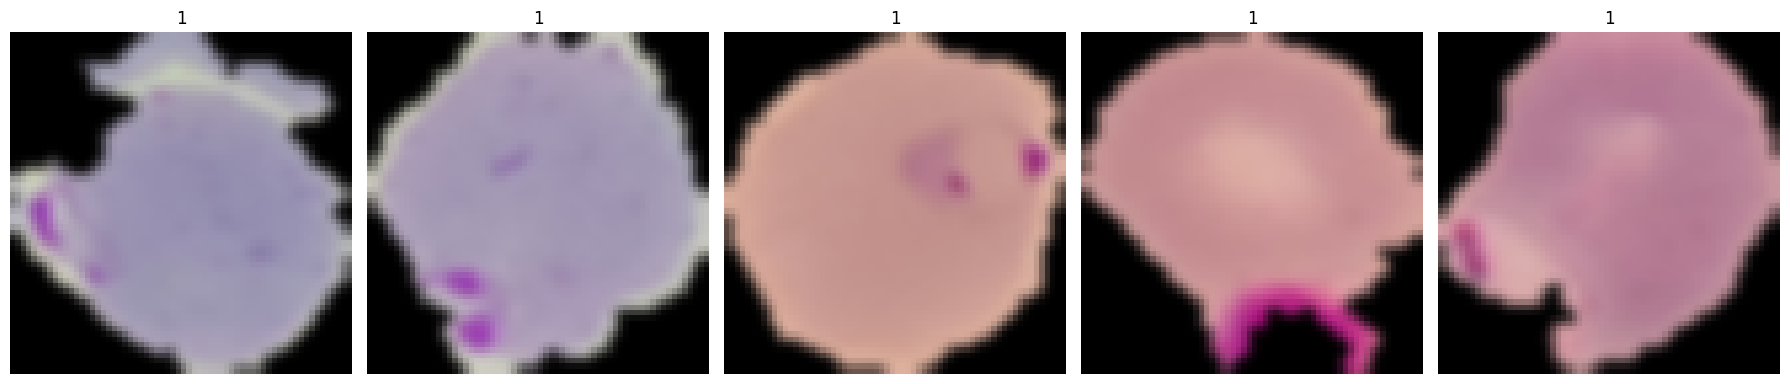

In [ ]:
import cv2

test_blurred = []   # to hold the HSV image array
for i in np.arange(0, 100, 1):
    a = cv2.GaussianBlur(test_images[i],(5,5),0)
    test_blurred.append(a)

test_blurred = np.array(test_blurred)
viewimage = np.random.randint(0, 100, 5)

fig, ax = plt.subplots(1, 5, figsize=(18, 18))

for t, i in enumerate(viewimage):
    Title = test_labels[i]
    ax[t].set_title(Title)
    ax[t].imshow(test_blurred[i])
    ax[t].set_axis_off()

fig.tight_layout()
plt.show()

####**Observations and insights:**
* the above images shows the gaussian applied images from the dataset.
* As we have observed, if we apply it carefully on our model it can help enhance feature extraction( parasitized and uninfected ) from the test dataset.

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

## **Model Building**

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [ ]:
import tensorflow as tf
# Keras Sequential Model
from tensorflow.keras.models import Sequential
# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Clearing backend
from tensorflow.keras import backend
from random import shuffle
backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<B>One Hot Encoding the train and test labels

In [ ]:
# Creating one-hot encoded representation of target labels
# using keras utility function
train_encoded = tf.keras.utils.to_categorical(train_labels)
test_encoded = tf.keras.utils.to_categorical(test_labels )
#testing labels
test_encoded

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

###<b> Building the model

In [ ]:
# Creating sequential model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu", input_shape=(64, 64, 3)))

# First Max Pooling Layer
model.add(MaxPooling2D(pool_size=2))

# First Dropout Layer to prevent overfitting
model.add(Dropout(0.2))

# Second Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))

# Second Max Pooling Layer
model.add(MaxPooling2D(pool_size=2))

# Second Dropout Layer to prevent overfitting
model.add(Dropout(0.2))

# Third Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))

# Third Max Pooling Layer
model.add(MaxPooling2D(pool_size=2))

# Third Dropout Layer to prevent overfitting
model.add(Dropout(0.2))

# Flatten the data for fully connected layers
model.add(Flatten())

# First Fully Connected Layer with 512 neurons and ReLU activation
model.add(Dense(512, activation="relu"))

# Dropout Layer to prevent overfitting
model.add(Dropout(0.4))

# Output layer with 2 neurons for binary classification (e.g., Parasitized and Uninfected)
model.add(Dense(2, activation="softmax"))



In [ ]:
# Model summary to display the architecture and the number of parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

<b> Using Callbacks

In [ ]:
#using Callbacks (Earlystopping and ModelCheckpoint)
es= tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', mode='min')
mc= tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=True)

<b> Fit and train our Model

In [ ]:
history=model.fit(train_images,train_encoded,epochs=20,batch_size = 32,verbose = 1, callbacks=[es,mc],validation_split = 0.2)

Epoch 1/20
624/624 [==============================] - 127s 201ms/step - loss: 2.2851 - accuracy: 0.5965 - val_loss: 0.7116 - val_accuracy: 0.4770
Epoch 2/20
624/624 [==============================] - 129s 207ms/step - loss: 0.6302 - accuracy: 0.6474 - val_loss: 0.5904 - val_accuracy: 0.7718
Epoch 3/20
624/624 [==============================] - 121s 194ms/step - loss: 0.2912 - accuracy: 0.8676 - val_loss: 0.2606 - val_accuracy: 0.9121
Epoch 4/20
624/624 [==============================] - 116s 186ms/step - loss: 0.1502 - accuracy: 0.9465 - val_loss: 0.1789 - val_accuracy: 0.9806
Epoch 5/20
624/624 [==============================] - 108s 174ms/step - loss: 0.1371 - accuracy: 0.9566 - val_loss: 0.1341 - val_accuracy: 0.9788
Epoch 6/20
624/624 [==============================] - 113s 182ms/step - loss: 0.1097 - accuracy: 0.9653 - val_loss: 0.1501 - val_accuracy: 0.9814
Epoch 7/20
624/624 [==============================] - 105s 169ms/step - loss: 0.1055 - accuracy: 0.9671 - val_loss: 0.1306 -

###<b> Evaluating the model on test data

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_images, test_encoded)

# Print the test loss and accuracy
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

82/82 [==============================] - 3s 35ms/step - loss: 0.0570 - accuracy: 0.9846
Test Loss: 0.0570
Test Accuracy: 0.9846


<b> Plotting the confusion matrix

82/82 [==============================] - 5s 59ms/step


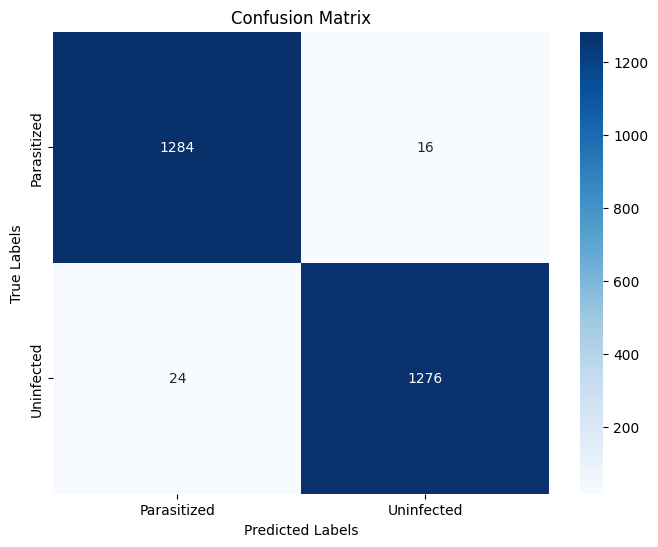

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Get the model predictions on the test data
y_pred = model.predict(test_images)
 # Convert one-hot encoded predictions to class indices
pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded test labels to class indices
true_classes = np.argmax(test_encoded, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

# Get the class names (if available)
class_names = ["Parasitized", "Uninfected"]

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

<b>Plotting the train and validation curves

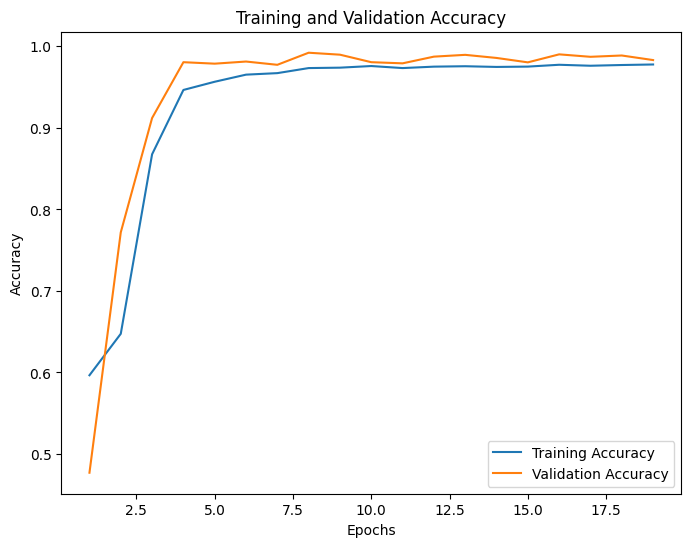

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
# Clearing backend
from tensorflow.keras import backend
from random import shuffle
backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

###<b> Building the Model

In [ ]:
# Building another model with fourth layer for better perfromance
# Creating sequential model
model1 = Sequential()

# First Convolutional Layer
model1.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu", input_shape=(64, 64, 3)))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))

# Second Convolutional Layer
model1.add(Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))

# Third Convolutional Layer
model1.add(Conv2D(filters=128, kernel_size=2, padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))

# Fourth Convolutional Layer
model1.add(Conv2D(filters=256, kernel_size=2, padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))

# Flatten the data for fully connected layers
model1.add(Flatten())

# First Fully Connected Layer with 512 neurons and ReLU activation
model1.add(Dense(512, activation="relu"))
model1.add(Dropout(0.4))

# Second Fully Connected Layer with 256 neurons and ReLU activation
model1.add(Dense(256, activation="relu"))
model1.add(Dropout(0.4))

# Output layer with 2 neurons for binary classification (e.g., parasitized and uninfected)
model1.add(Dense(2, activation="softmax"))

In [ ]:
# Model summary to display the architecture and the number of parameters
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 64)       

###<b> Compiling the model

In [ ]:
#compiling Model1
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

<b> Using Callbacks

In [ ]:
#using Callbacks (Earlystopping and ModelCheckpoint)
es= tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', mode='min')
mc= tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=True)

<b>Fit and Train the model

In [ ]:
history=model1.fit(train_images,train_encoded,epochs=30,batch_size = 32,verbose = 1, callbacks=[es,mc],validation_split = 0.2)

Epoch 1/30
624/624 [==============================] - 154s 244ms/step - loss: 1.8814 - accuracy: 0.6086 - val_loss: 0.8116 - val_accuracy: 0.0000e+00
Epoch 2/30
624/624 [==============================] - 130s 209ms/step - loss: 0.6596 - accuracy: 0.6269 - val_loss: 0.8474 - val_accuracy: 0.0000e+00
Epoch 3/30
624/624 [==============================] - 139s 223ms/step - loss: 0.4049 - accuracy: 0.8004 - val_loss: 0.1384 - val_accuracy: 0.9766
Epoch 4/30
624/624 [==============================] - 140s 225ms/step - loss: 0.1617 - accuracy: 0.9505 - val_loss: 0.1145 - val_accuracy: 0.9627
Epoch 5/30
624/624 [==============================] - 130s 208ms/step - loss: 0.1231 - accuracy: 0.9632 - val_loss: 0.1144 - val_accuracy: 0.9742
Epoch 6/30
624/624 [==============================] - 134s 215ms/step - loss: 0.1038 - accuracy: 0.9690 - val_loss: 0.0916 - val_accuracy: 0.9714
Epoch 7/30
624/624 [==============================] - 128s 206ms/step - loss: 0.0968 - accuracy: 0.9705 - val_loss: 

###<b> Evaluating the model

In [ ]:
# Evaluate model1 on the test data
loss1, accuracy1 = model1.evaluate(test_images, test_encoded)

# Print the test loss and accuracy
print(f"Test Loss: {loss1:.4f}")
print(f"Test Accuracy: {accuracy1:.4f}")

82/82 [==============================] - 4s 43ms/step - loss: 0.0702 - accuracy: 0.9773
Test Loss: 0.0702
Test Accuracy: 0.9773


<b> Plotting the confusion matrix

82/82 [==============================] - 4s 42ms/step


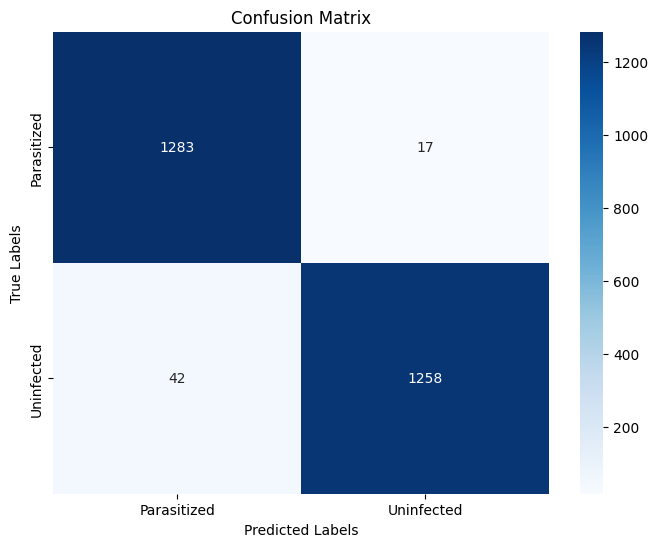

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Get the model1 predictions on the test data
y_pred = model1.predict(test_images)
 # Convert one-hot encoded predictions to class indices
pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded test labels to class indices
true_classes = np.argmax(test_encoded, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

# Get the class names
class_names = ["Parasitized", "Uninfected"]

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

<b> Plotting the train and the validation curves

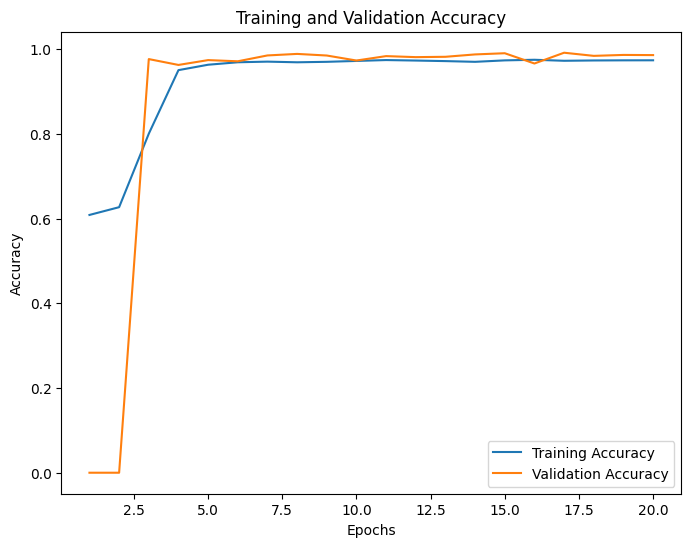

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.


###**FINAL MODEL**
###<b> Model 2 with Batch Normalization



In [ ]:
# Clearing backend
import tensorflow as tf
from tensorflow.keras import backend
from random import shuffle
backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

###<b> Building the Model

In [ ]:
# Creating sequential model
model2 = Sequential()

# First Convolutional Layer with BatchNormalization and LeakyReLU
model2.add(Conv2D(filters=32, kernel_size=2, padding="same", input_shape=(64, 64, 3)))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.2))

# Second Convolutional Layer with BatchNormalization and LeakyReLU
model2.add(Conv2D(filters=64, kernel_size=2, padding="same"))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.2))

# Third Convolutional Layer with BatchNormalization and LeakyReLU
model2.add(Conv2D(filters=128, kernel_size=2, padding="same"))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.2))

# Flatten the data for fully connected layers
model2.add(Flatten())

# First Fully Connected Layer with BatchNormalization and LeakyReLU
model2.add(Dense(512))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(Dropout(0.4))

# Output layer with 2 neurons for binary classification (e.g., parasitized and uninfected)
model2.add(Dense(2, activation="softmax"))

In [ ]:
# Model summary to display the architecture and the number of parameters
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        8

###<b>Compiling the model

In [ ]:
#compiling Model2
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

<b> Using callbacks

In [ ]:
#using Callbacks (Earlystopping and ModelCheckpoint)
es= tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', mode='min')
mc= tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=True)

<b>Fit and train the model

In [ ]:
history=model2.fit(train_images,train_encoded,epochs=10,batch_size = 32,verbose = 1, callbacks=[es,mc],validation_split = 0.2)

Epoch 1/30
624/624 [==============================] - 285s 453ms/step - loss: 0.3922 - accuracy: 0.8341 - val_loss: 0.0102 - val_accuracy: 0.9982
Epoch 2/30
624/624 [==============================] - 259s 414ms/step - loss: 0.1518 - accuracy: 0.9457 - val_loss: 0.0126 - val_accuracy: 0.9968
Epoch 3/30
624/624 [==============================] - 265s 425ms/step - loss: 0.1218 - accuracy: 0.9588 - val_loss: 0.0252 - val_accuracy: 0.9954
Epoch 4/30
624/624 [==============================] - 318s 509ms/step - loss: 0.1099 - accuracy: 0.9623 - val_loss: 0.0278 - val_accuracy: 0.9946


<b>Plotting the train and validation accuracy

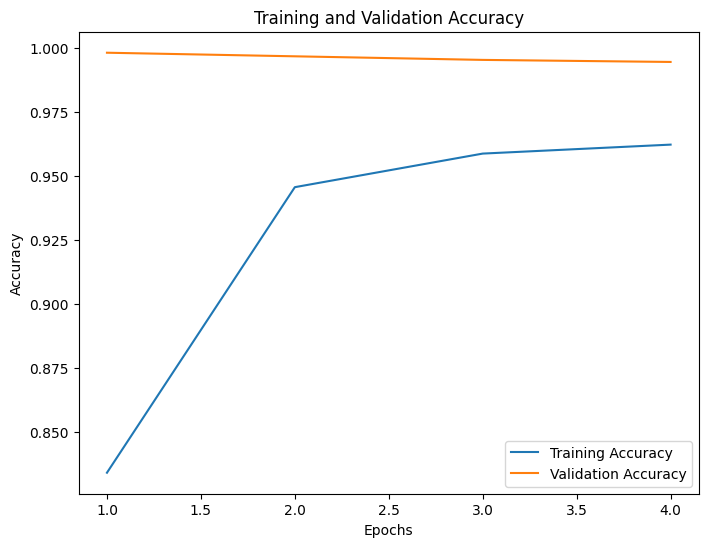

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

###<b>Evaluating the model

In [ ]:
# Evaluate model1 on the test data
loss2, accuracy2 = model2.evaluate(test_hsv, test_encoded)

# Print the test loss and accuracy
print(f"Test Loss: {loss1:.4f}")
print(f"Test Accuracy: {accuracy1:.4f}")

82/82 [==============================] - 7s 77ms/step - loss: 0.1317 - accuracy: 0.9650
Test Loss: 0.0702
Test Accuracy: 0.9773


####<b>Observations and insights:####



*  As observed from the above graph, it is clear that the model is performing well on the validation data having accuracy of around 99%.
*   While training Accuracy boosted up to the peak of 96% after 2nd epoch.



<b> Generate the classification report and confusion matrix

82/82 [==============================] - 10s 125ms/step


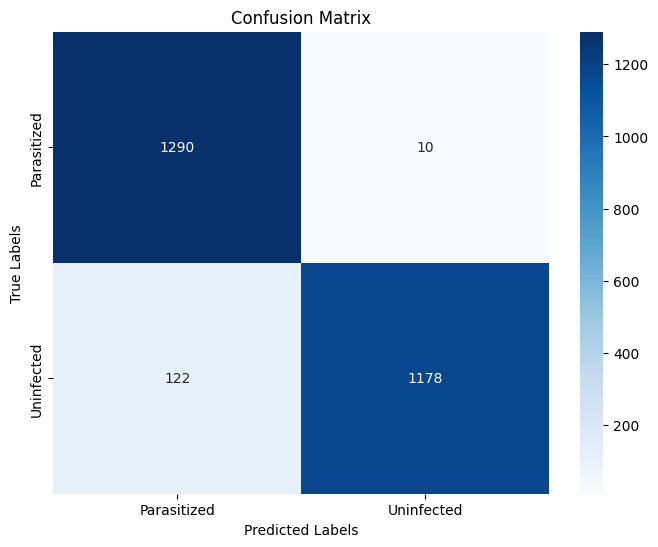

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1300
           1       0.99      0.91      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Get the model1 predictions on the test data
y_pred = model2.predict(test_hsv)
 # Convert one-hot encoded predictions to class indices
pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded test labels to class indices
true_classes = np.argmax(test_encoded, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

# Get the class names
class_names = ["Parasitized", "Uninfected"]

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(true_classes, pred_classes))



###<b> Model 2 with Batch Normalization (USING HSV IMAGES)


In [ ]:
# Clearing backend
import tensorflow as tf
from tensorflow.keras import backend
from random import shuffle
backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# **Building the model**

In [ ]:
# Creating sequential model
model_2 = Sequential()

# First Convolutional Layer with BatchNormalization and LeakyReLU
model_2.add(Conv2D(filters=32, kernel_size=2, padding="same", input_shape=(64, 64, 3)))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(alpha=0.1))
model_2.add(MaxPooling2D(pool_size=2))
model_2.add(Dropout(0.2))

# Second Convolutional Layer with BatchNormalization and LeakyReLU
model_2.add(Conv2D(filters=64, kernel_size=2, padding="same"))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(alpha=0.1))
model_2.add(MaxPooling2D(pool_size=2))
model_2.add(Dropout(0.2))

# Third Convolutional Layer with BatchNormalization and LeakyReLU
model_2.add(Conv2D(filters=128, kernel_size=2, padding="same"))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(alpha=0.1))
model_2.add(MaxPooling2D(pool_size=2))
model_2.add(Dropout(0.2))

# Flatten the data for fully connected layers
model_2.add(Flatten())

# First Fully Connected Layer with BatchNormalization and LeakyReLU
model_2.add(Dense(512))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(alpha=0.1))
model_2.add(Dropout(0.4))

# Output layer with 2 neurons for binary classification (e.g., parasitized and uninfected)
model_2.add(Dense(2, activation="softmax"))

In [ ]:
# Model summary to display the architecture and the number of parameters
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        8

# **Compiling the** **model**

In [ ]:
#compiling Model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Using Callbacks**

In [ ]:
#using Callbacks (Earlystopping and ModelCheckpoint)
es= tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', mode='min')
mc= tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=True)

<b>Fit and train the model

In [ ]:
history=model_2.fit(train_hsv,train_encoded,epochs=20,batch_size = 32,verbose = 1, callbacks=[es,mc],validation_split = 0.2)

Epoch 1/20
65/65 [==============================] - 28s 406ms/step - loss: 0.0866 - accuracy: 0.9716 - val_loss: 8.8962e-04 - val_accuracy: 1.0000
Epoch 2/20
65/65 [==============================] - 25s 391ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.6805e-04 - val_accuracy: 1.0000
Epoch 3/20
65/65 [==============================] - 25s 375ms/step - loss: 8.5285e-04 - accuracy: 1.0000 - val_loss: 9.7457e-05 - val_accuracy: 1.0000
Epoch 4/20
65/65 [==============================] - 26s 399ms/step - loss: 5.8577e-04 - accuracy: 1.0000 - val_loss: 3.4403e-05 - val_accuracy: 1.0000
Epoch 5/20
65/65 [==============================] - 26s 401ms/step - loss: 3.8496e-04 - accuracy: 1.0000 - val_loss: 2.6809e-05 - val_accuracy: 1.0000
Epoch 6/20
65/65 [==============================] - 25s 380ms/step - loss: 3.6512e-04 - accuracy: 1.0000 - val_loss: 2.1141e-05 - val_accuracy: 1.0000
Epoch 7/20
65/65 [==============================] - 27s 409ms/step - loss: 2.6219e-04 - accuracy: 1.00

<b>Plotting the train and validation accuracy

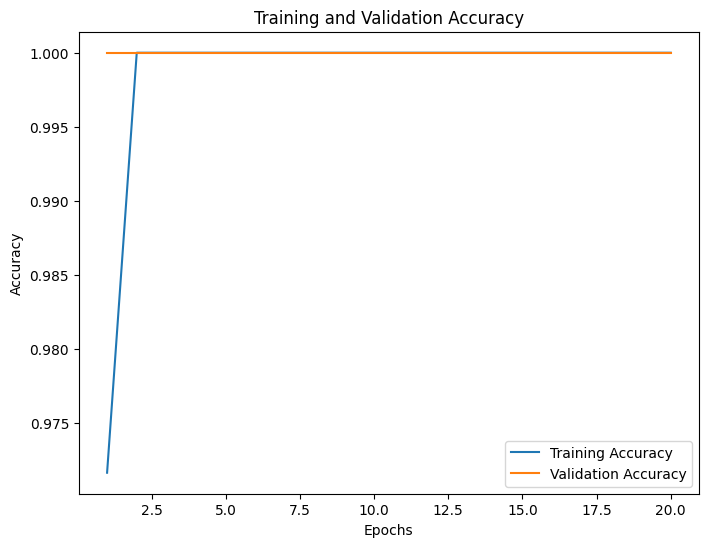

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

###<b>Evaluating the model

In [ ]:
# Evaluate model2 on the test data
loss2, accuracy2 = model_2.evaluate(test_hsv, test_encoded)

# Print the test loss and accuracy
print(f"Test Loss: {loss2:.4f}")
print(f"Test Accuracy: {accuracy2:.4f}")

82/82 [==============================] - 10s 115ms/step - loss: 7.5583 - accuracy: 0.5000
Test Loss: 7.5583
Test Accuracy: 0.5000


<b> Generate the classification report and confusion matrix

82/82 [==============================] - 8s 92ms/step


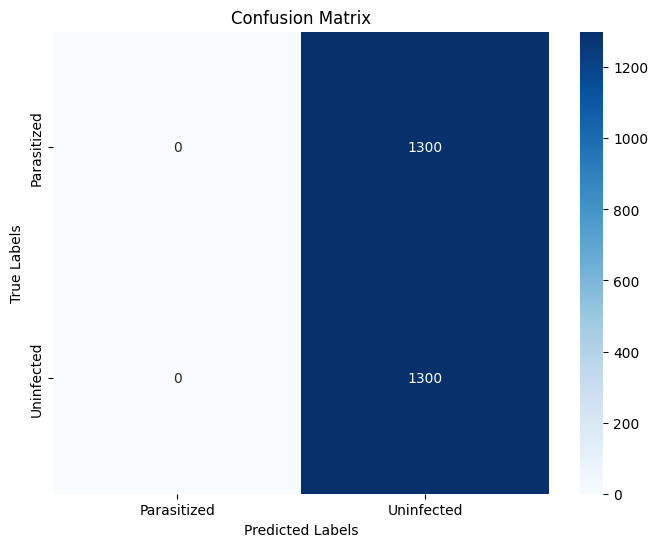

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1300
           1       0.50      1.00      0.67      1300

    accuracy                           0.50      2600
   macro avg       0.25      0.50      0.33      2600
weighted avg       0.25      0.50      0.33      2600



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Get the model1 predictions on the test data
y_pred = model_2.predict(test_hsv)
 # Convert one-hot encoded predictions to class indices
pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded test labels to class indices
true_classes = np.argmax(test_encoded, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

# Get the class names
class_names = ["Parasitized", "Uninfected"]

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(true_classes, pred_classes))

####<b>Observations and insights:####



*   The model performed well on the training data but at the same time reached 100% accuracy which is also a point of concern that this model can be overfitting.
*   As observed in the confusion matrix, we can see that the model performed bad on unseen data and its accuracy dropped to 50%



###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [ ]:
# Clearing backend
from tensorflow.keras import backend
from random import shuffle
backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

###<b> Use image data generator

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(vertical_flip=True, zoom_range=0.5, rotation_range=30)
val_datagen = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x=X_train, y=y_train, batch_size=64, seed=42, shuffle=True)

# Flowing validation images using val_datagen generator
val_generator = val_datagen.flow(x=X_val, y=y_val, batch_size=64, seed=42, shuffle=True)

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

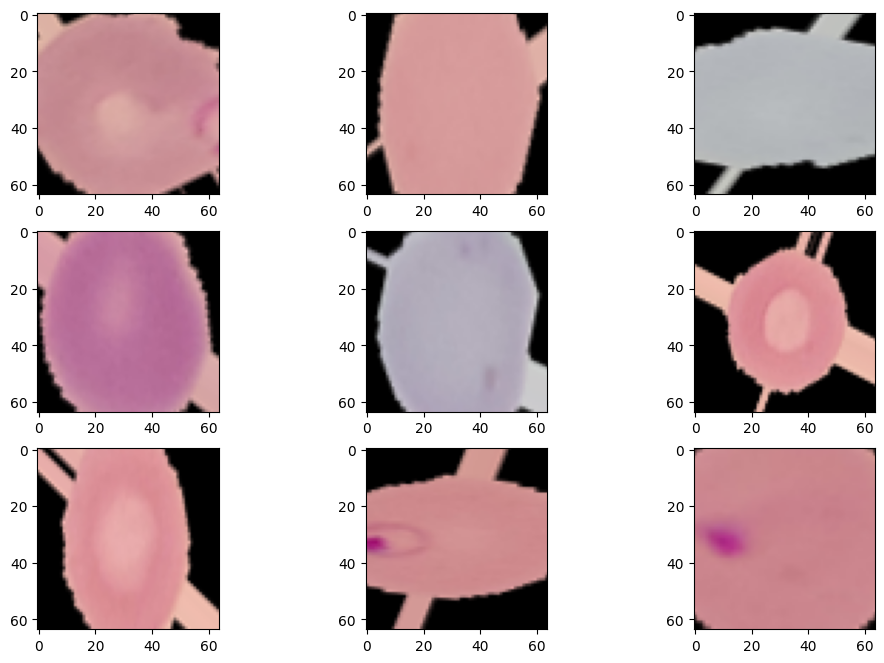

In [ ]:
# Generate and plot sample images
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(330 + 1 + i)
    # Generate batch of images
    batch = train_generator.next()
    # Convert to unsigned integers for viewing
    image = batch[0][0].astype('uint8')
    plt.imshow(image)

plt.show()

####<b>Observations and insights: ____

###<b>Building the Model

In [ ]:
#building 3rd Sequential model
model3 = Sequential()
# First Convolutional Layer with BatchNormalization and LeakyReLU
model3.add(Conv2D(filters=32, kernel_size=2, padding="same", input_shape=(64, 64, 3)))
model3.add(LeakyReLU(alpha=0.1))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))
# Second Convolutional Layer with BatchNormalization and LeakyReLU
model3.add(Conv2D(filters=64, kernel_size=2, padding="same"))
model3.add(LeakyReLU(alpha=0.1))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))
# third Convolutional Layer with BatchNormalization and LeakyReLU
model3.add(Conv2D(filters=128, kernel_size=2, padding="same"))
model3.add(LeakyReLU(alpha=0.1))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))
# Flatten the data for fully connected layers
model3.add(Flatten())
# first fully connected layer with batch normalization and LeakyReLU
model3.add(Dense(512))
model3.add(LeakyReLU(alpha=0.1))
model3.add(BatchNormalization())
model3.add(Dropout(0.4))
# Output layer with 2 neurons for binary classification (e.g., parasitized and uninfected)
model3.add(Dense(2, activation="softmax"))

In [ ]:
#model3 summary
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        8

In [ ]:
#compiling the model
model3.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

<b>Using Callbacks

In [ ]:
#using Callbacks (Earlystopping and ModelCheckpoint)
es= tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', mode='min')
mc= tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=True)

<b> Fit and Train the model

In [ ]:
# Train the model using augmented images
history = model3.fit(train_generator, steps_per_epoch=len(X_train) // 64, epochs=20, validation_data=val_generator, validation_steps=len(X_val) // 64, callbacks=(es,mc))

Epoch 1/20
311/311 [==============================] - 317s 1s/step - loss: 0.6975 - accuracy: 0.7019 - val_loss: 0.4000 - val_accuracy: 0.8267
Epoch 2/20
311/311 [==============================] - 271s 872ms/step - loss: 0.2946 - accuracy: 0.8852 - val_loss: 2.2430 - val_accuracy: 0.5327
Epoch 3/20
311/311 [==============================] - 254s 818ms/step - loss: 0.2349 - accuracy: 0.9161 - val_loss: 1.0061 - val_accuracy: 0.5569
Epoch 4/20
311/311 [==============================] - 252s 811ms/step - loss: 0.2118 - accuracy: 0.9241 - val_loss: 0.2392 - val_accuracy: 0.8796
Epoch 5/20
311/311 [==============================] - 251s 808ms/step - loss: 0.1920 - accuracy: 0.9326 - val_loss: 0.1196 - val_accuracy: 0.9557
Epoch 6/20
311/311 [==============================] - 256s 821ms/step - loss: 0.1761 - accuracy: 0.9370 - val_loss: 0.1291 - val_accuracy: 0.9567
Epoch 7/20
311/311 [==============================] - 246s 791ms/step - loss: 0.1800 - accuracy: 0.9359 - val_loss: 0.0914 - va

###<B>Evaluating the model

<b>Plot the train and validation accuracy

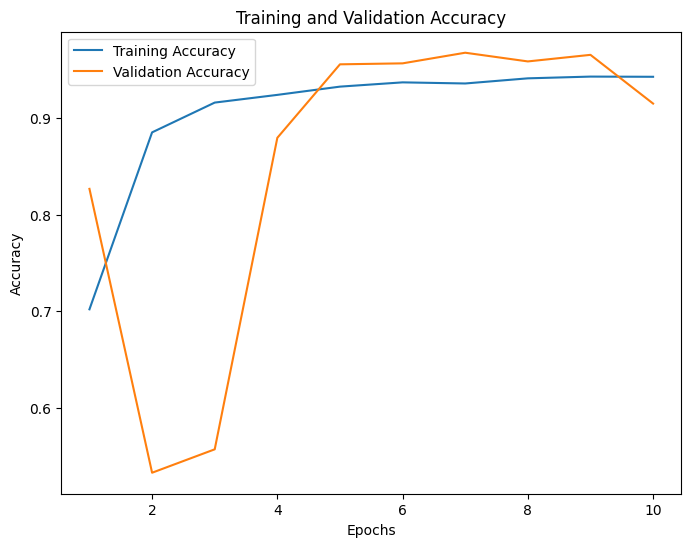

In [ ]:
import matplotlib.pyplot as plt

# Access the training and validation accuracy from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

<B>Plotting the classification report and confusion matrix

82/82 [==============================] - 8s 99ms/step


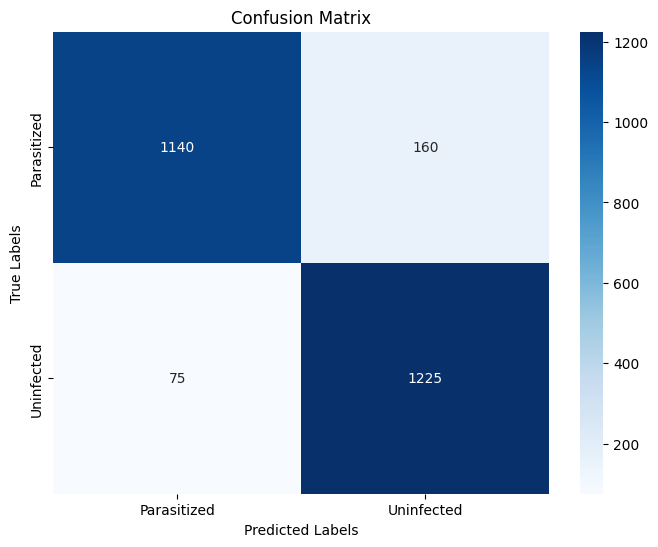

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1300
           1       0.88      0.94      0.91      1300

    accuracy                           0.91      2600
   macro avg       0.91      0.91      0.91      2600
weighted avg       0.91      0.91      0.91      2600



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Get the model1 predictions on the test data
y_pred = model3.predict(test_images)
 # Convert one-hot encoded predictions to class indices
pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded test labels to class indices
true_classes = np.argmax(test_encoded, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

# Get the class names
class_names = ["Parasitized", "Uninfected"]

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(true_classes, pred_classes))

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**
- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

In [ ]:
# Clearing backend
from tensorflow.keras import backend
from random import shuffle
backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from keras.layers import LeakyReLU

# Load the VGG16 model without the fully connected layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Choose the layer until which you want to include
chosen_layer = 'block4_pool'  # Example: 'block4_pool' or 'block5_pool'

# Create a new model by adding fully connected layers on top of the chosen layer
x = vgg_base.get_layer(chosen_layer).output
x = Flatten()(x)
x = Dense(4096)(x)
x = LeakyReLU(alpha=0.1)(x)  # Leaky ReLU with alpha=0.1
x = Dense(4096)(x)
x = LeakyReLU(alpha=0.1)(x)  # Leaky ReLU with alpha=0.1
output = Dense(2, activation='softmax')(x)  # Assuming 2 classes for binary classification

model4= Model(inputs=vgg_base.input, outputs=output)

# Freeze the layers of VGG16 so they are not trainable
for layer in vgg_base.layers:
    layer.trainable = False

###<b>Compiling the model

In [ ]:
#compiling Model4
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

<b> using callbacks

In [ ]:
import tensorflow as tf
es= tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', mode='min')
mc= tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=True)

<b>Fit and Train the model

In [ ]:
history=model4.fit(train_images,train_encoded,epochs=10,batch_size = 32,verbose = 1, callbacks=[es,mc],validation_split = 0.2)

Epoch 1/10
624/624 [==============================] - 1589s 3s/step - loss: 127.6030 - accuracy: 0.9262 - val_loss: 12.1419 - val_accuracy: 0.9305
Epoch 2/10
624/624 [==============================] - 1571s 3s/step - loss: 4.6445 - accuracy: 0.9610 - val_loss: 0.9942 - val_accuracy: 0.9870
Epoch 3/10
624/624 [==============================] - 1569s 3s/step - loss: 58.8118 - accuracy: 0.9442 - val_loss: 24.0129 - val_accuracy: 0.9918
Epoch 4/10
624/624 [==============================] - 1569s 3s/step - loss: 39.8267 - accuracy: 0.9567 - val_loss: 0.1647 - val_accuracy: 0.9994
Epoch 5/10
624/624 [==============================] - 1567s 3s/step - loss: 14.7845 - accuracy: 0.9676 - val_loss: 94.3270 - val_accuracy: 0.8446
Epoch 6/10
624/624 [==============================] - 1573s 3s/step - loss: 11.4773 - accuracy: 0.9700 - val_loss: 5.6680 - val_accuracy: 0.9902
Epoch 7/10
624/624 [==============================] - 1577s 3s/step - loss: 569.3495 - accuracy: 0.9539 - val_loss: 1499.5500 -

<b>Plot the train and validation accuracy

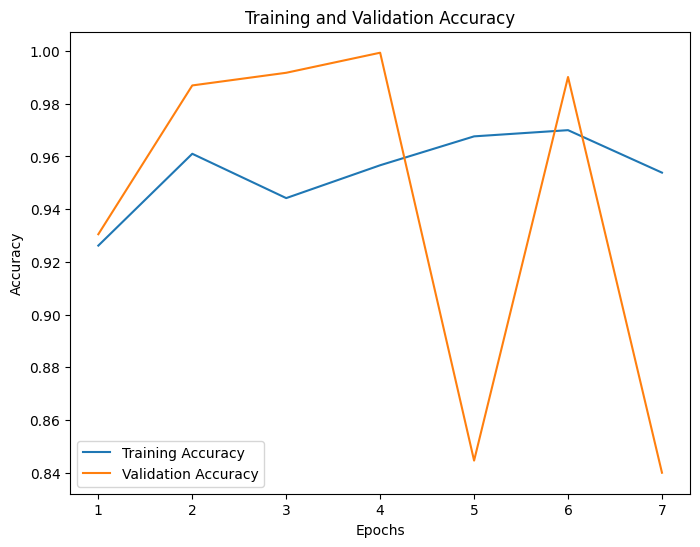

In [ ]:
import matplotlib.pyplot as plt

# Access the training and validation accuracy from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

###**Observations and insights: **

*  the model was performing well on validation data between 2-4 epochs but after that we can observe the validation Accuracy was quite uneven , showing the model was confused about the unseen data.
* As we have used pre-trained model VGG16 and saved training time and data but may require careful fine-tuning to adapt the model to this specific task.
* The Training Accuracy on the otherhand looks quite promising starting from around 92% and increased to 95%

###<b> Evaluating the model

In [ ]:
# Evaluate model1 on the test data
loss4, accuracy4 = model4.evaluate(test_images, test_encoded)

# Print the test loss and accuracy
print(f"Test Loss: {loss4:.4f}")
print(f"Test Accuracy: {accuracy4:.4f}")

82/82 [==============================] - 114s 1s/step - loss: 972.3538 - accuracy: 0.8992
Test Loss: 972.3538
Test Accuracy: 0.8992


<b>Plotting the classification report and confusion matrix

82/82 [==============================] - 112s 1s/step


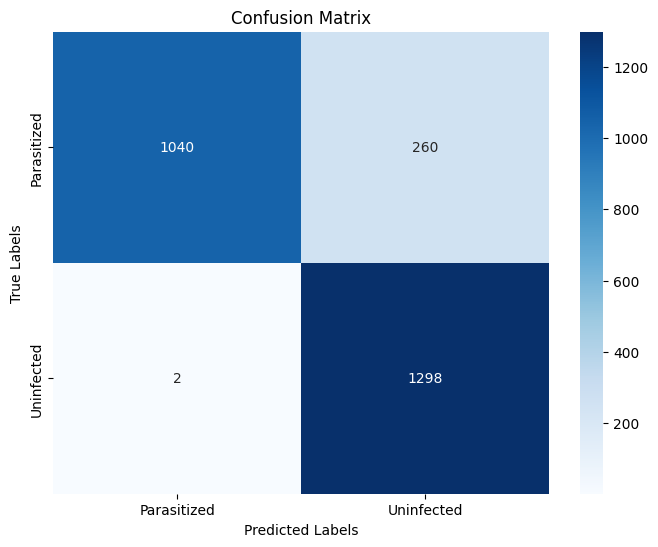

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89      1300
           1       0.83      1.00      0.91      1300

    accuracy                           0.90      2600
   macro avg       0.92      0.90      0.90      2600
weighted avg       0.92      0.90      0.90      2600



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Get the model1 predictions on the test data
y_pred = model4.predict(test_images)
 # Convert one-hot encoded predictions to class indices
pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded test labels to class indices
true_classes = np.argmax(test_encoded, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

# Get the class names
class_names = ["Parasitized", "Uninfected"]

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(true_classes, pred_classes))

###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choose the model with the best accuracy scores from all the above models and save it as a final model.


####<b> Observations and Conclusions drawn from the final model:


1.   Among All the above models, the final model would be 'Model 2'
2.   Considering the validation accuracies of all four models, Model 2 (with a  validation accuracy of approximately 99.52%) still appears to be the best-performing model for malaria detection.





**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?
*  You can try to build a model using these HSV images and compare them with your other models.

#### **Insights**

####**Refined insights**:
- The most meaningful insights from the data relevant to the problem are:
1. The dataset is relatively balanced between parasitized and uninfected images.
2. The training set contains 25,958 images, and the test set contains 2,600 images.
3. Equal test set size ensures fair evaluation of model performance.
4. We have used data augmentation to enhance model generalization (having variaties whitin the existing dataset).
5. Used metrics like accuracy, precision, recall, F1-score, and confusion matrix for model evaluation.
6. We have understood the significance of malaria-specific image features for model optimization

####**Comparison of various techniques and their relative performance**:
- Based on the Model's validation accuracies, we can observe how different techniques have performed in the context of malaria detection:
* Model 1: Validation accuracy of 98.60%.
* Model 2 (with Batch Normalization and Leaky ReLU): Best performer with a validation accuracy of 99.52%. Batch Normalization and Leaky ReLU likely contributed to its improved performance.
* Model 3 (with Data Augmentation): Also performed well with a validation accuracy of 91.51%. Data augmentation helped the model generalize better.
* Model 4 (based on VGG16): Had a lower validation accuracy of 83.99%. Further optimization of the model architecture and hyperparameters may be needed.

In summary, Model 2 with Batch Normalization and Leaky ReLU showed the highest validation accuracy, making it the most promising model among the four. However, there's potential to improve the performance of all models through hyperparameter tuning, regularization, and architectural adjustments.

####**The final solution design (Model 2)**:


*  For the Malairia Detection problem, I am proposing Model 2 ( with Batch Normalization and Leaky ReLU) as my final solution design because of the following factors:

*  Model 2 has  achieved the highest validation accuracy of approximately 99%, indicating strong generalization capability and good performance on unseen data in comparison to other models.

* Model 2 demonstrates reasonable resource utilization, including memory and processing power/time, which makes it perform better than Model 3 and Model 4 practically.(based on the time and RAM models took while processing)


####**Potential risk / Challenges of the proposed Design**:


*   Overfitting: Deep learning models can overfit to training data with numerous parameters; ensuring generalization to new data is vital.
* Limited Data: Small or homogeneous datasets may hinder pattern learning; data augmentation helps but might not fully solve the issue.
* Resource Intensiveness: Deep learning demands powerful hardware, leading to extended training times and higher resource costs.
* Deployment Complexity: Real-world deployment presents challenges like model size, inference speed, and platform compatibility.
* Generalization: The model must perform well on diverse, unseen images for practical use.
* Data Quality: Accurate, well-labeled, and representative datasets are essential for model effectiveness.
* Regulatory and Privacy Concerns: Medical and privacy regulations may apply, particularly if patient data is involved.


